In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import cv2
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
sns.set()
from PIL import Image
from matplotlib import image
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
# images = [cv2.imread(file) for file in glob.glob("\GTSRB\Training\00000\*.ppm")]
train_data_path = ".\dataset\Train.csv"
test_data_path = ".\dataset\Test.csv"
train_path = "dataset\Train"

train_data = pd.read_csv(train_data_path)

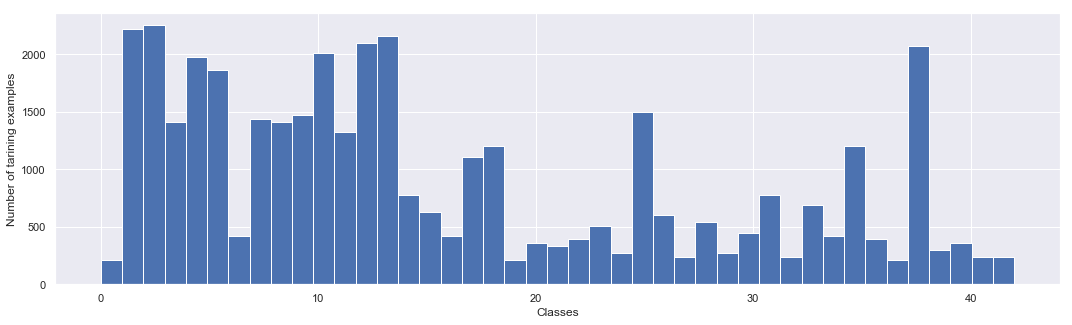

In [3]:
plt.figure(figsize=[18,5]);
plt.hist(train_data["ClassId"], bins=43, );
plt.ylabel("Number of tarining examples");
plt.xlabel("Classes");

In [4]:
train_data.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [5]:
train_data.keys()

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [6]:
train_data.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


#### Pre-processing
##### 1. Load image
##### 2. Resize image to 32* 32
##### 3. Convert to grayscale
##### 4. Eqilize image for better contrast
##### 5. Convert image between range [0 and 1]
##### 6. Convert labels to one-hot

In [40]:
img_dimentions = (32,32)
def pre_processing_(train_data):
    number_of_images = train_data.shape
    number_of_images[0]
    

    train_images = []

    for i in range(number_of_images[0]):
        img = cv2.imread("dataset/"+train_data.Path[i])
        img = cv2.resize(img, img_dimentions)
        img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_equilize = cv2.equalizeHist(img_grayscale) # improve contrast
        img_scale = img_grayscale / 255.00

        train_images.append(img_scale)
    # One- hot encoding labels
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(train_data.ClassId)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    train_labels = onehot_encoder.fit_transform(integer_encoded)
    return np.array(train_images), train_labels

train_images, train_labels = pre_processing_(train_data)

D:\Installed_Softwares\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Augmentation
#### 1. 

In [41]:
#     # Classes of signs that, when flipped horizontally, should still be classified as the same class
horizontally_flippable = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that, when flipped vertically, should still be classified as the same class
vertically_flippable = np.array([1, 5, 12, 15, 17])
# Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
both_flippable = np.array([32, 40])
# Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
cross_flippable = np.array([
    [19, 20], 
    [33, 34], 
    [36, 37], 
    [38, 39],
    [20, 19], 
    [34, 33], 
    [37, 36], 
    [39, 38],   
])

In [42]:
# Horizontal 

datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow_from_directory(train_path, target_size= img_dimentions, color_mode="grayscale")

Found 39209 images belonging to 43 classes.


In [43]:
generator1 = ImageDataGenerator(horizontal_flip=True)

[0.28627451 0.25882353 0.25882353 0.29019608 0.32156863 0.32941176
 0.31372549 0.31372549 0.30980392 0.30980392 0.29803922 0.30196078
 0.2627451  0.17647059 0.16470588 0.15686275 0.16078431 0.17254902
 0.20784314 0.20392157 0.19215686 0.16862745 0.16470588 0.16470588
 0.16862745 0.16078431 0.16078431 0.18039216 0.22352941 0.28235294
 0.30980392 0.23137255]


ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (32,))

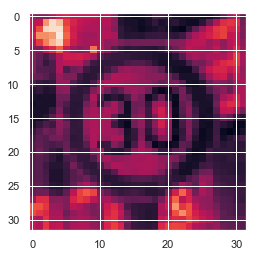

In [49]:
plt.imshow(train_images[2000]);
print(train_images[2000][0])
aug_iter = generator1.flow((train_images[2000][0]));
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]